In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_graph_simple(file):
    G = nx.read_graphml(file)
    nx.draw(G, with_labels = True)

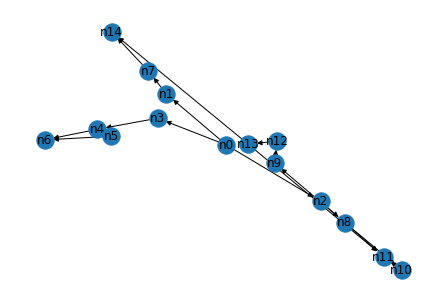

In [3]:
draw_graph_simple("test/small_dag.graphml")

In [4]:
def getRoots(G):
    childrenSet = set()
    for edge in G.edges:
        childrenSet.add(edge[1]) 
    return set(G.nodes) - childrenSet

In [5]:
def reindexRoots(G):
    roots = getRoots(G)
    new_roots = set()
    num = 1
    map_indexes = {}
    for root in roots:
        new_index = root + "|" + str(1)
        map_indexes[root] = new_index
        new_roots.add(new_index)
    G = nx.relabel_nodes(G, map_indexes)
    num += 1
    return G, new_roots

In [6]:
def check_potential(G, processed_vertex, node):
    if node in processed_vertex:
        return False, []
    input_nodes = []
    candidate = True
    for edge in G.edges:
        if edge[1] == node:
            input_nodes.append(edge[0])
            if edge[0] not in processed_vertex:
                candidate = False
                break
    return candidate, input_nodes

In [7]:
def get_sort_value(item):
    return int(item.split("|")[1])

In [8]:
def sort_items(first_, second_):
    first = []
    second = []
    for el in first_:
        first.append(get_sort_value(el))
    for el in second_:
        second.append(get_sort_value(el)) 
    first.sort(reverse=True)
    second.sort(reverse=True)
    return first, second

In [9]:
def isLess(first_, second_):
    first, second = sort_items(first_, second_)
    print(first)
    print(second)
    min_len = min(len(first), len(second))
    for i in range(min_len):
        if first[i] < second[i]:
            return True
        if first[i] > second[i]:
            return False
    return len(first) < len(second)

In [10]:
def get_minimal(candidates, minimal, candidate):
    if minimal == {}:
        return candidate
    if isLess(candidates.get(minimal), candidates.get(candidate)):
        return minimal
    else:
        return candidate

In [11]:
def get_minimal_candidate(candidates):
    print(candidates)
    if len(candidates) < 0:
        print("Smth goes wrong")
    minimal = {}
    for candidate in candidates:
        minimal = get_minimal(candidates, minimal, candidate)
    print(minimal)
    return minimal

In [12]:
def get_potential_nodes(G, processed_vertex, candidates, node):
    for edge in G.edges(node):
        candidate, input_nodes = check_potential(G, processed_vertex, edge[1])
        if candidate:
            candidates[edge[1]] = input_nodes

In [13]:
def search_next(G, processed_vertex):
    candidates = {}
    for node in processed_vertex:
        get_potential_nodes(G, processed_vertex, candidates, node)
    return get_minimal_candidate(candidates)

In [14]:
def reindexChildren(G, roots):
    num = len(roots)
    processed_vertex = roots
    will_processed_vertex = roots
    while len(processed_vertex) != len(G.nodes):
        node = search_next(G, processed_vertex)
        num += 1
        next_node = node + "|" + str(num)
        map_index = {node: next_node}
        G = nx.relabel_nodes(G, map_index)
        processed_vertex.add(next_node)

In [15]:
def recalc_pos_GK(G):
    G, roots = reindexRoots(G)
    reindexChildren(G, roots)
    return

In [16]:
def draw_graph_GK(file):
    G = nx.read_graphml(file)
    recalc_pos_GK(G)

In [17]:
draw_graph_GK("test/small_dag.graphml")

{'n1': ['n0|1'], 'n2': ['n0|1'], 'n3': ['n0|1']}


TypeError: can only concatenate str (not "int") to str